In [67]:
##Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [83]:
##Importing the dataset
df_train = pd.read_csv('loan-train.csv')
df_test = pd.read_csv('loan-test.csv')

In [84]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [85]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Data Exploration

In [87]:
print(df_train.shape)
print(df_test.shape)

(614, 13)
(367, 12)


In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [91]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [100]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [92]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [93]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Handling Missing Values and duplicates

In [97]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [98]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [107]:
## Checking for Duplicate values
df_train.duplicated().sum()

0

In [108]:
df_test.duplicated().sum()

0

- So there are no duplicates in train and test dataset.

In [109]:
df_train.loc[df_train['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [115]:
gender_mode = df_train['Gender'].mode()[0]
df_train['Gender'].fillna(gender_mode, inplace=True)

In [117]:
df_train.loc[df_train['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [118]:
married_mode = df_train['Married'].mode()[0]
df_train['Married'].fillna(married_mode, inplace=True)

In [120]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
df_train.loc[df_train['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [123]:
dep_mode = df_train['Dependents'].mode()[0]
df_train['Dependents'].fillna(dep_mode, inplace=True)

In [125]:
df_train.loc[df_train['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [126]:
self_emp_mode = df_train['Self_Employed'].mode()[0]
df_train['Self_Employed'].fillna(self_emp_mode, inplace=True)

In [128]:
df_train.loc[df_train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [131]:
loan_amount_mean = round(df_train['LoanAmount'].mean())
df_train['LoanAmount'].fillna(loan_amount_mean, inplace=True)

In [135]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [134]:
df_train.loc[df_train['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [136]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [137]:
loan_amt_term_mode = df_train['Loan_Amount_Term'].mode()[0]
df_train['Loan_Amount_Term'].fillna(loan_amt_term_mode, inplace=True)

In [140]:
df_train.loc[df_train['Credit_History'].isnull()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y


In [142]:
credit_hit_mode = df_train['Credit_History'].mode()[0]
df_train['Credit_History'].fillna(credit_hit_mode, inplace=True)

In [144]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [145]:
### Let's do the same for test data
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [146]:
test_gender_mode = df_test['Gender'].mode()[0]
df_test['Gender'].fillna(test_gender_mode, inplace=True)

In [148]:
test_dep_mode = df_test['Dependents'].mode()[0]
df_test['Dependents'].fillna(test_dep_mode, inplace=True)

In [150]:
test_self_emp_mode = df_test['Self_Employed'].mode()[0]
df_test['Self_Employed'].fillna(test_self_emp_mode, inplace=True)

In [152]:
test_loan_amount_mean = round(df_test['LoanAmount'].mean())
df_test['LoanAmount'].fillna(test_loan_amount_mean, inplace=True)

In [154]:
test_loan_amt_term_mode = df_test['Loan_Amount_Term'].mode()[0]
df_test['Loan_Amount_Term'].fillna(test_loan_amt_term_mode, inplace=True)

In [156]:
test_credit_hit_mode = df_test['Credit_History'].mode()[0]
df_test['Credit_History'].fillna(test_credit_hit_mode, inplace=True)

In [157]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Data Visualization

In [158]:
### Categorical features
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtypes == 'O']
categorical_features.remove('Loan_ID')
categorical_features.append('Loan_Amount_Term')
categorical_features.append('Credit_History')
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Loan_Amount_Term',
 'Credit_History']

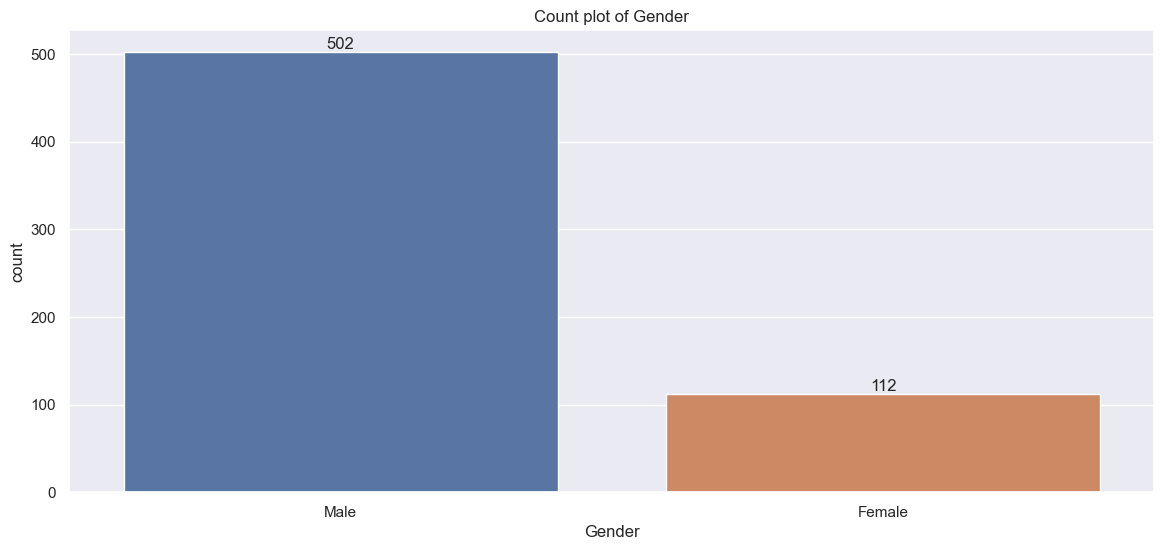

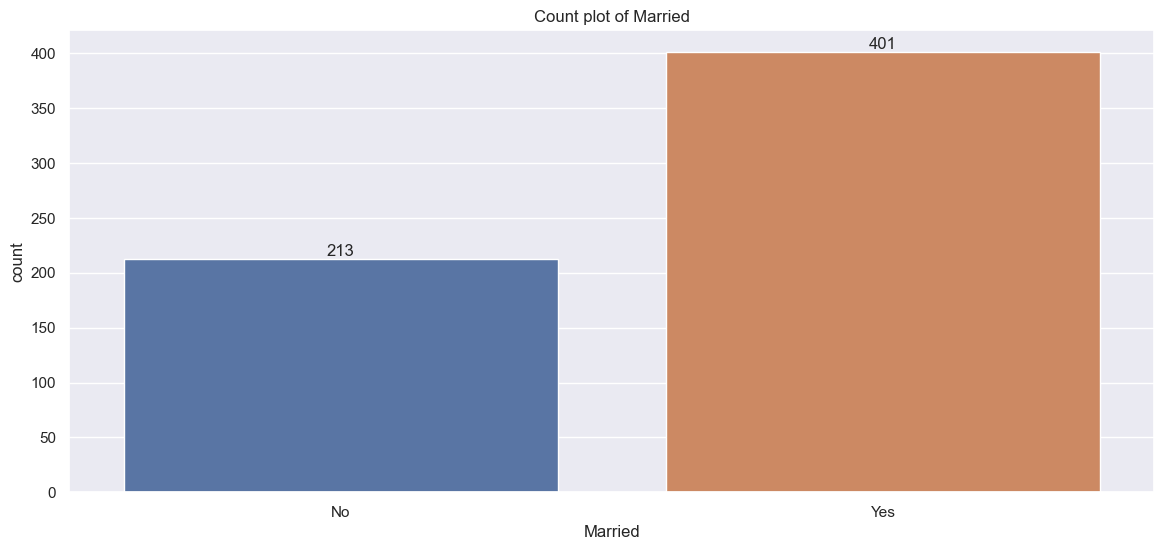

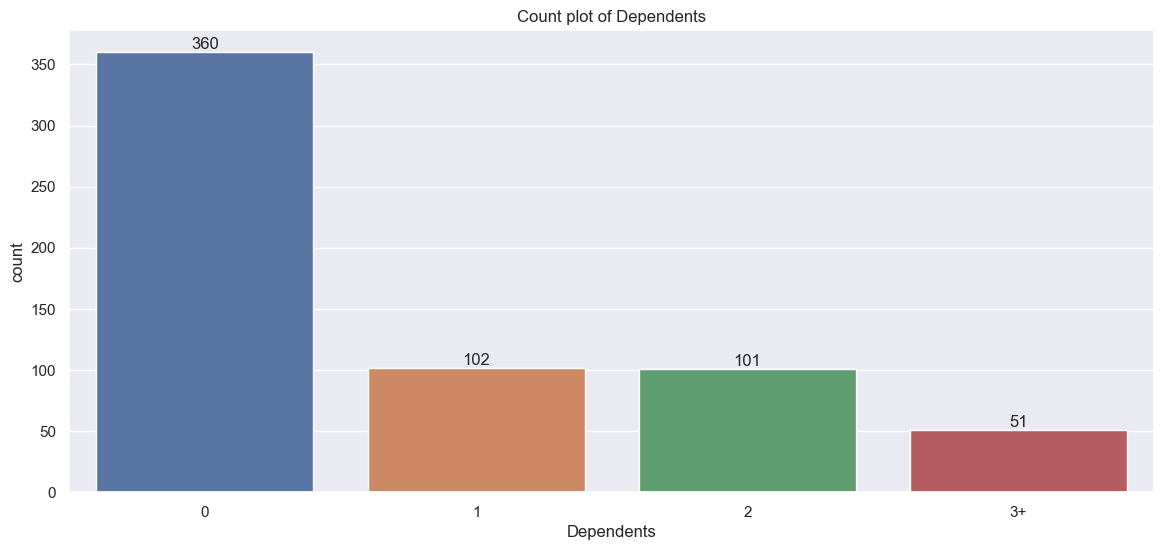

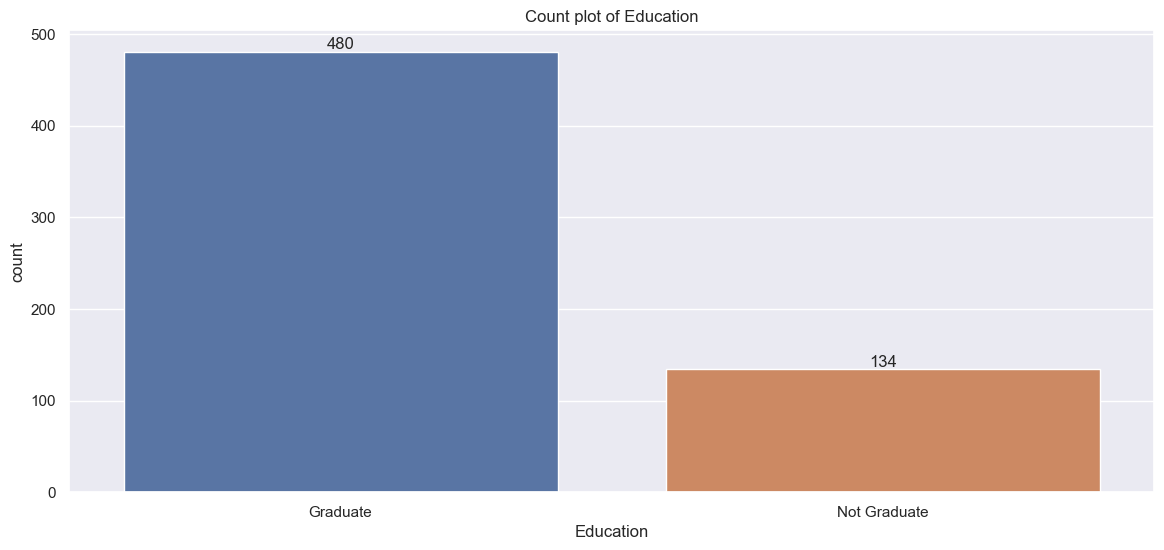

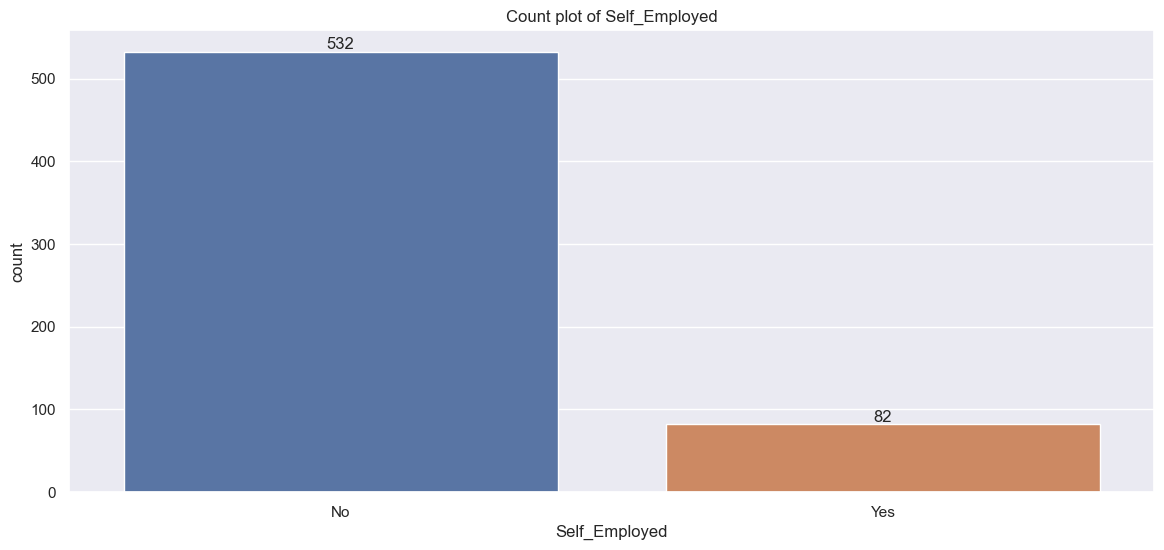

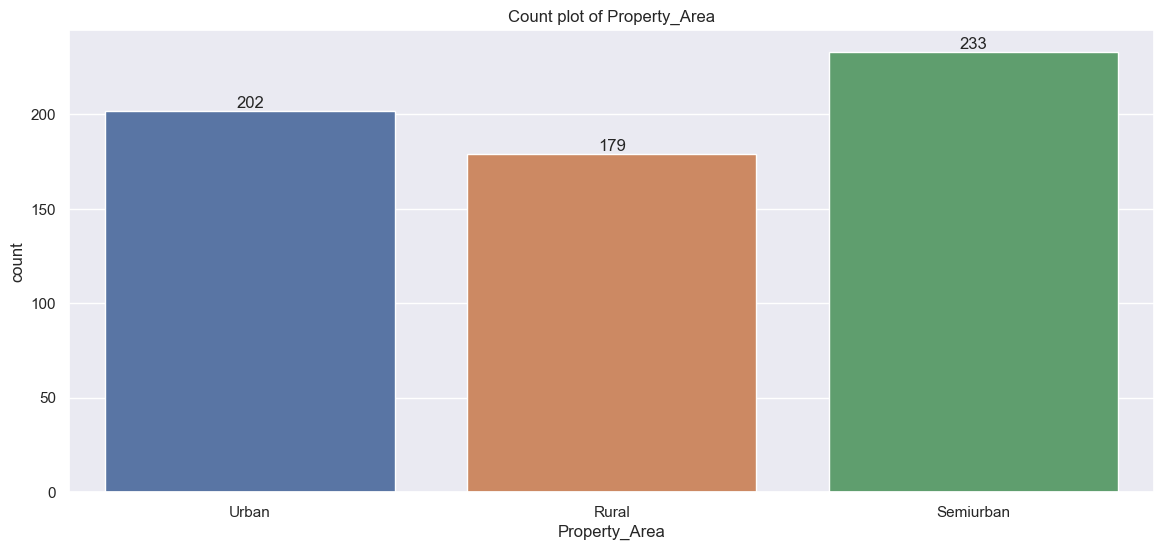

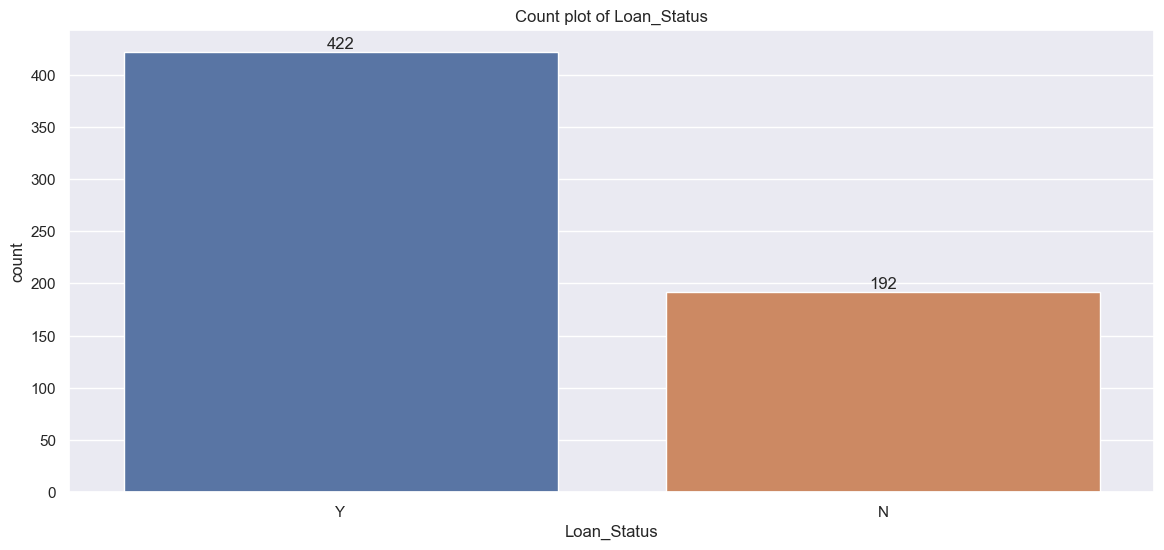

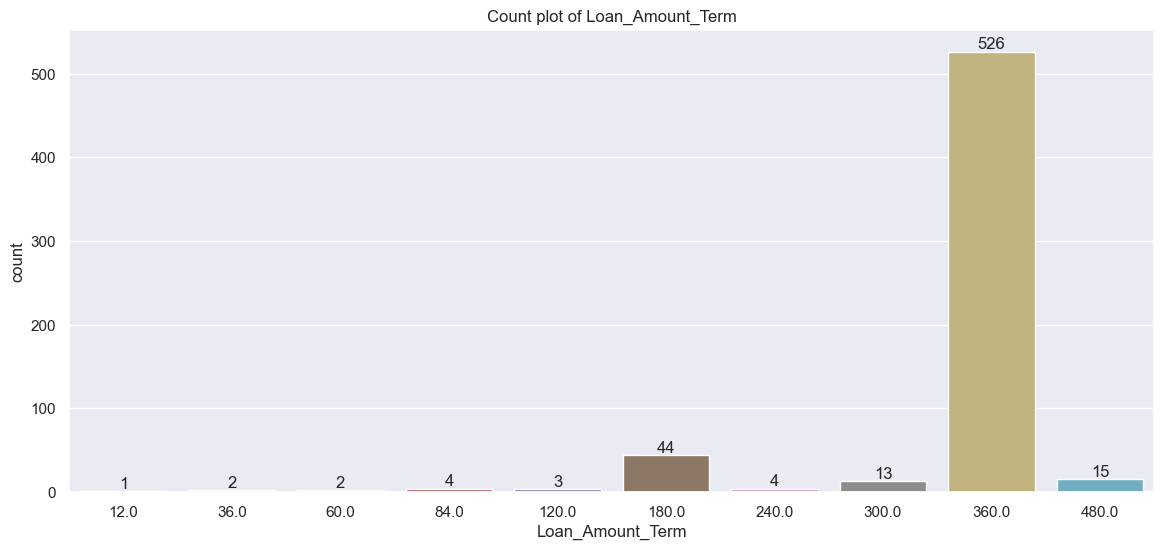

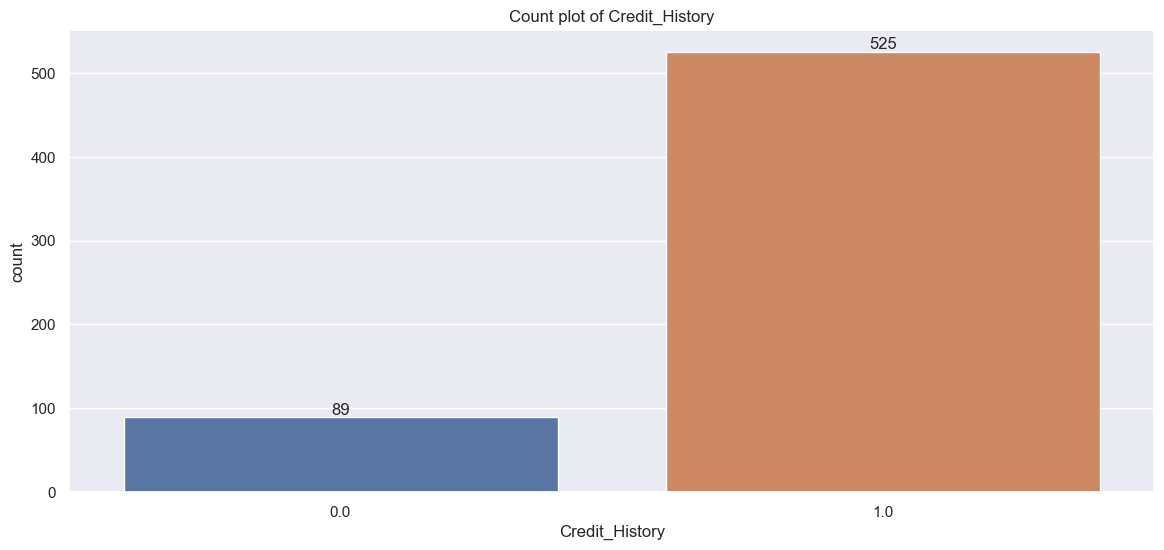

In [159]:
for feature in categorical_features:
    plt.figure(figsize=(14,6))
    plt.title(f'Count plot of {feature}')
    ax = sns.countplot(x = feature, data = df_train)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

In [160]:
### Numerical features
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
numerical_features.remove('Credit_History')
numerical_features.remove('Loan_Amount_Term')
numerical_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

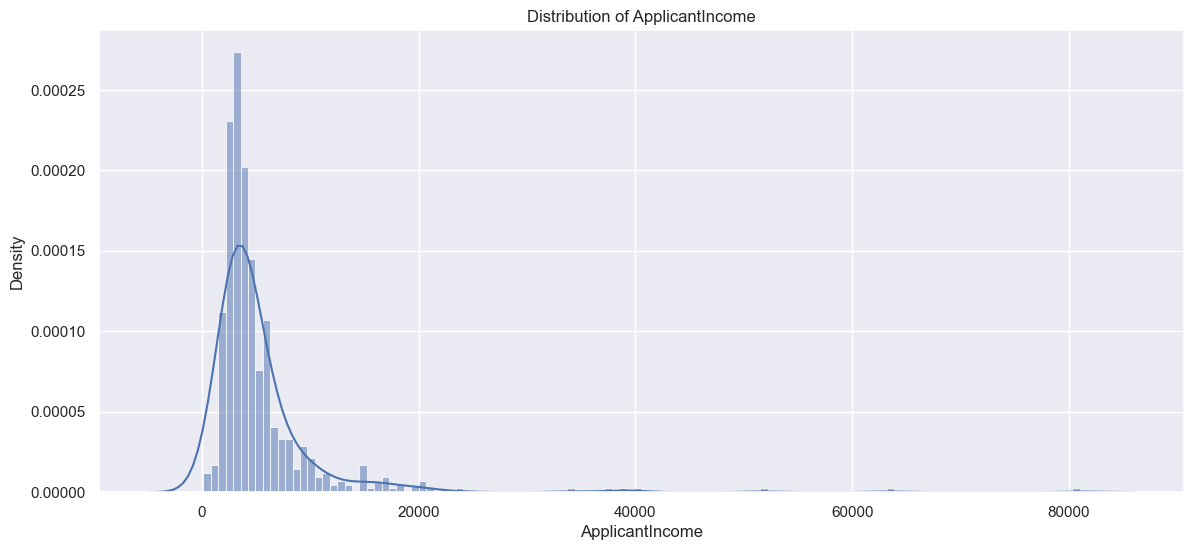

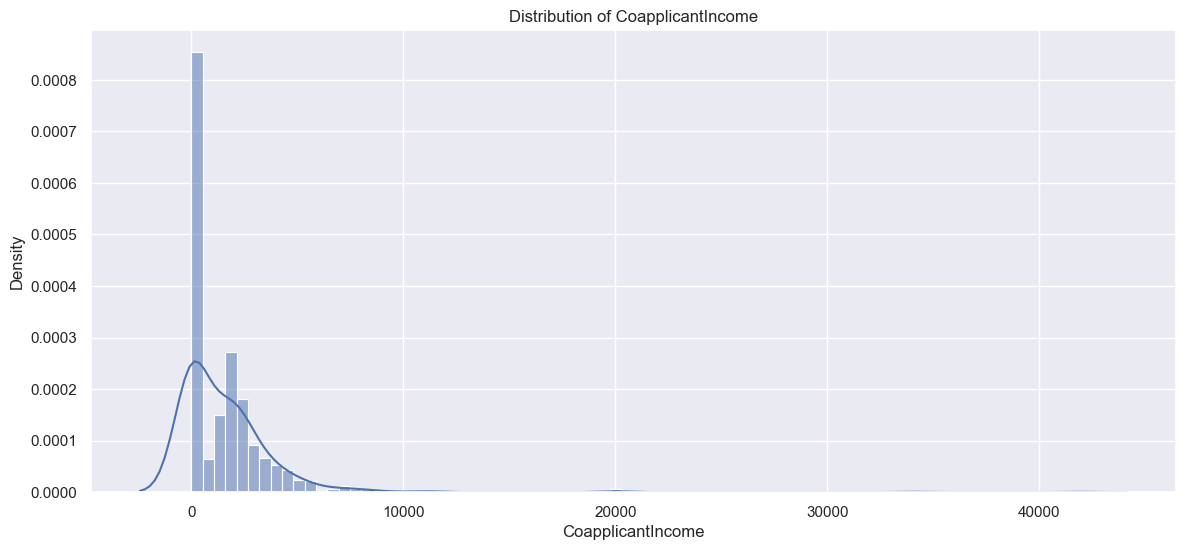

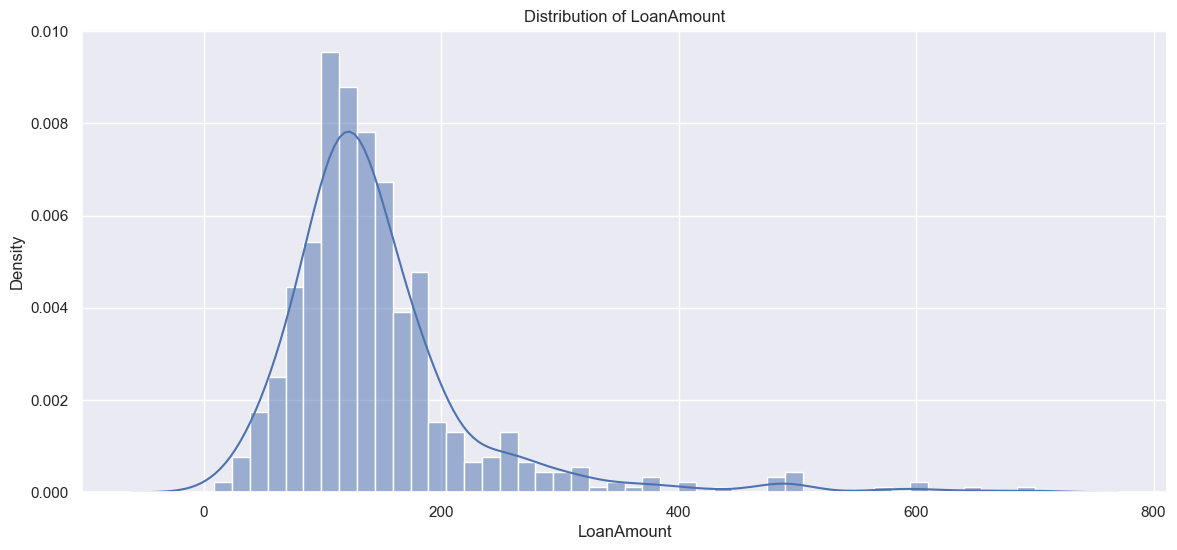

In [161]:
### Distribution of numerical features
for feature in numerical_features:
    plt.figure(figsize=(14,6))
    sns.histplot(df_train[feature], kde=True, stat='density',kde_kws=dict(cut=3))
    plt.title(f'Distribution of {feature}')
    plt.show()

- So numerical_features are right skewed. We will apply transformation to make them normally distributed but we will remove outliers first.

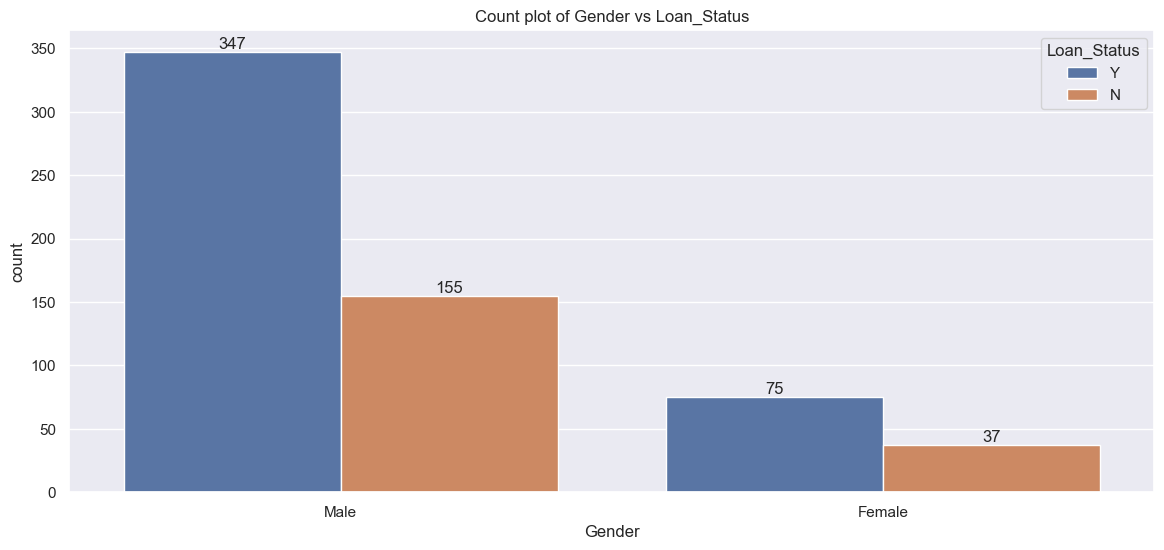

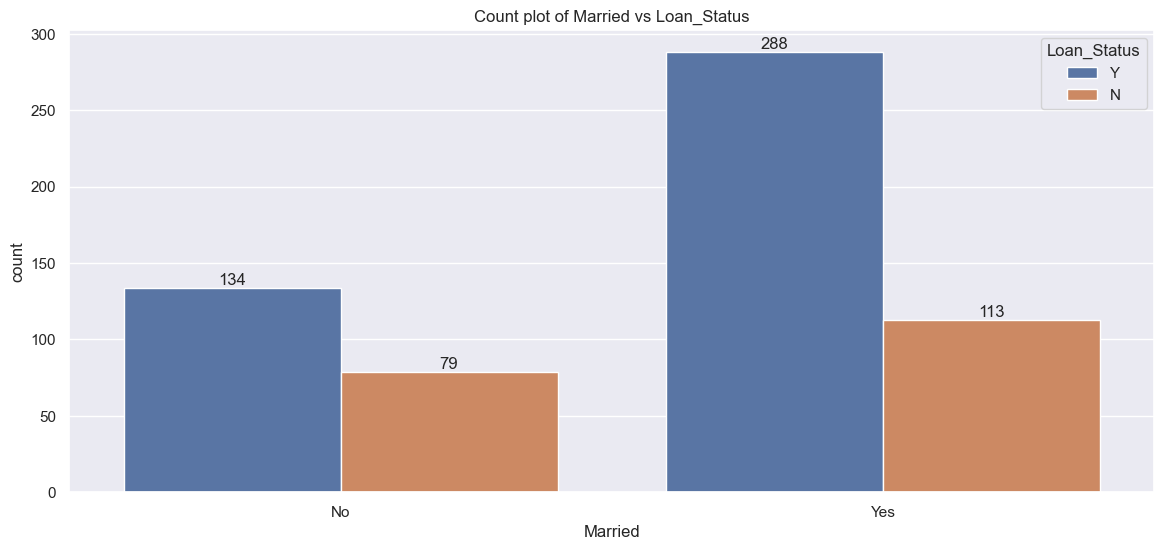

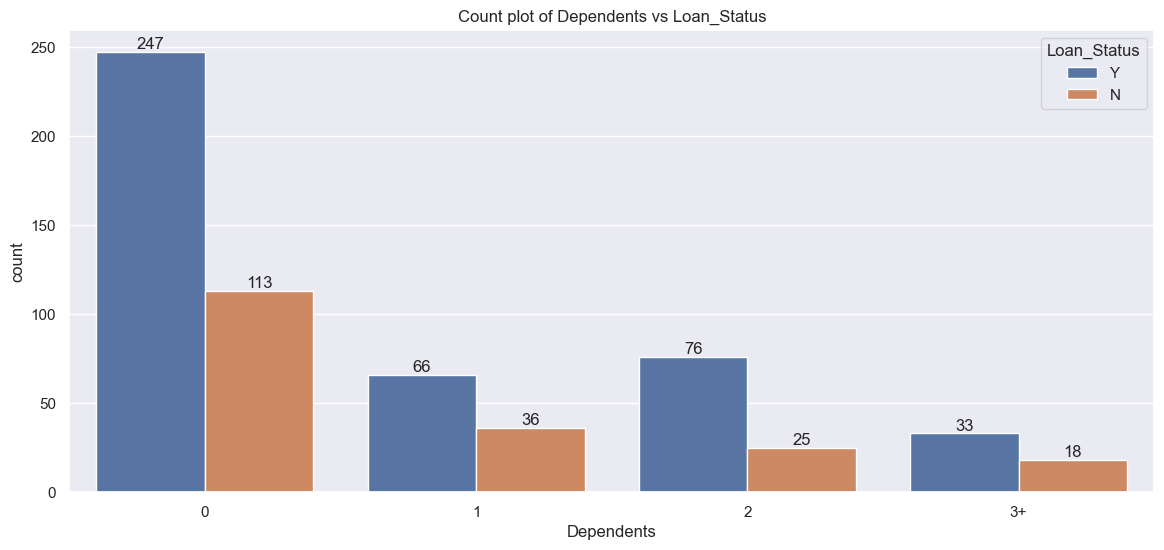

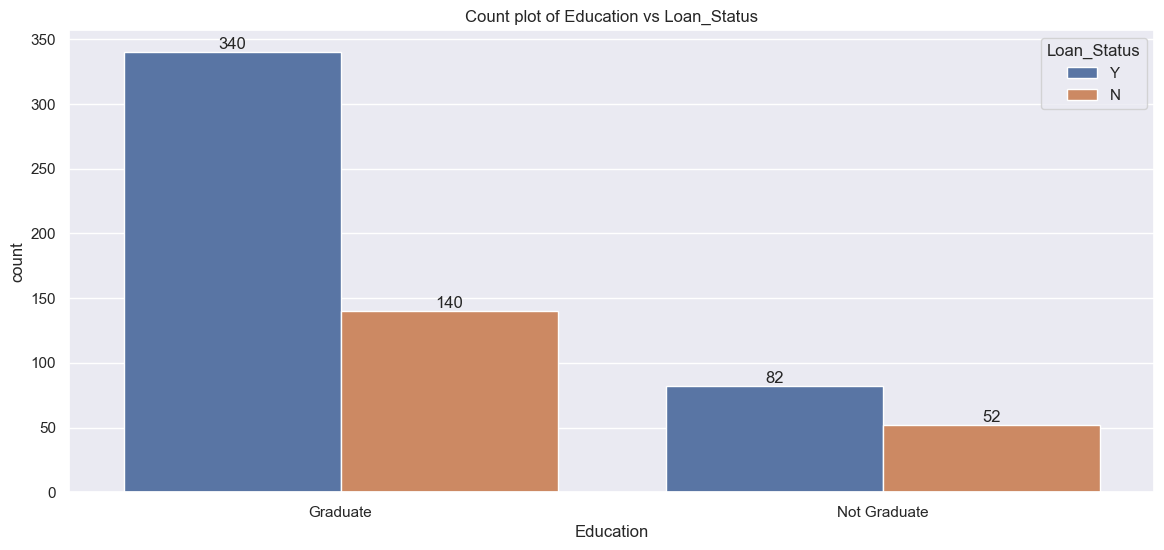

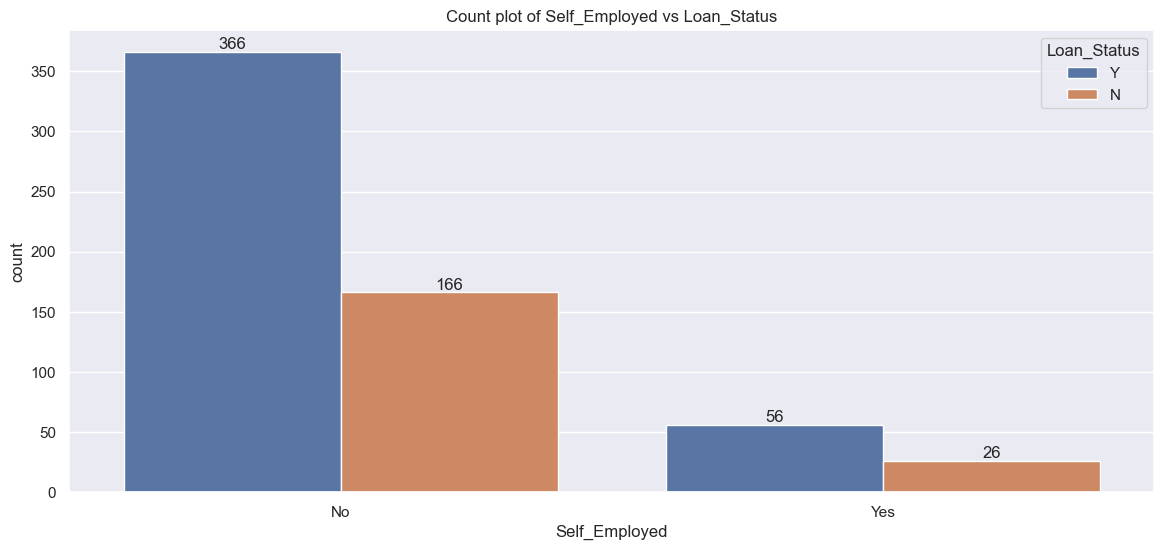

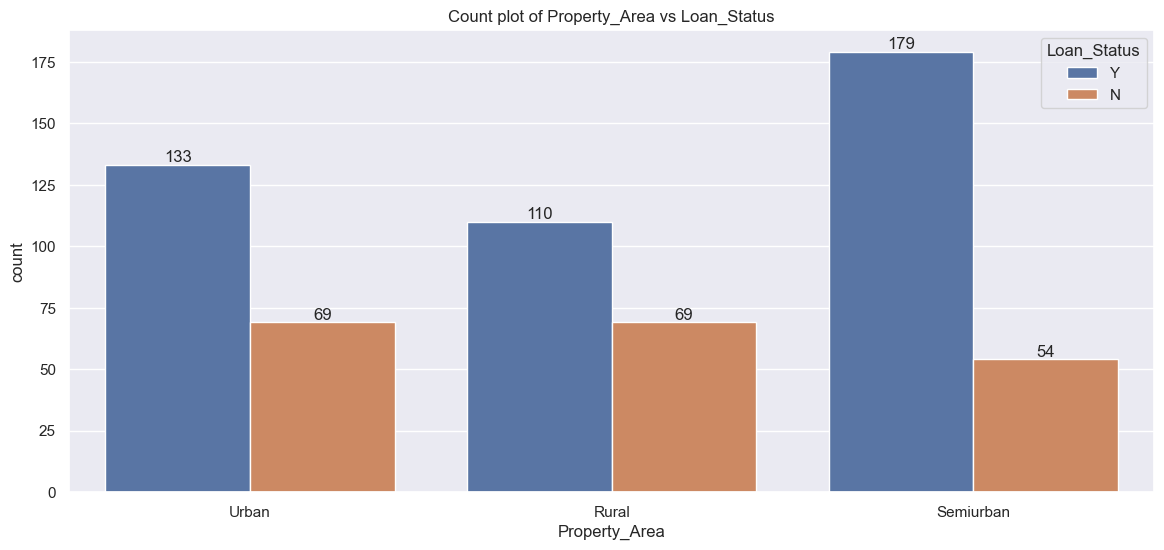

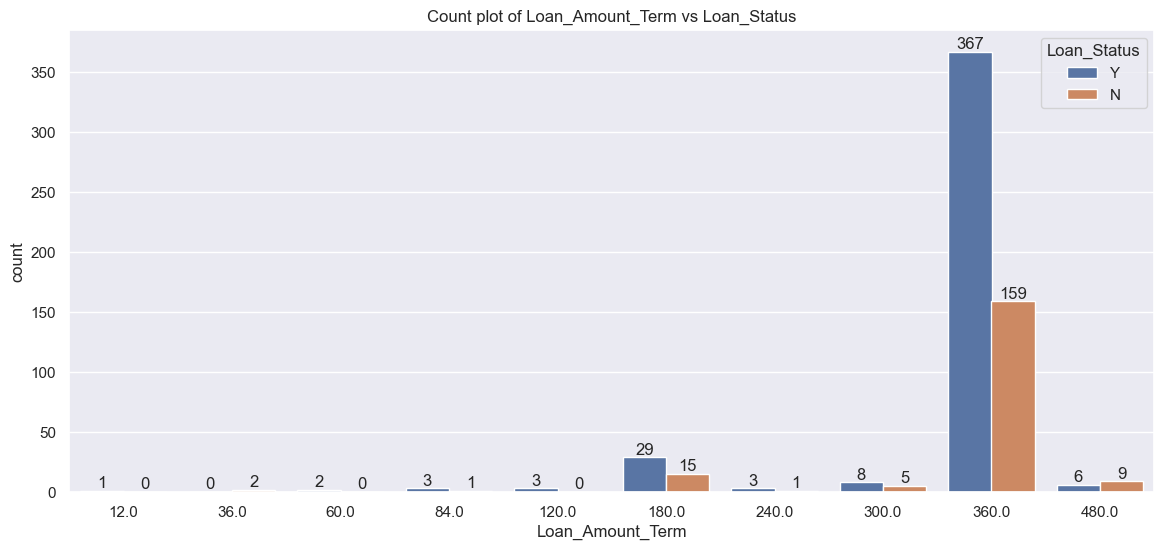

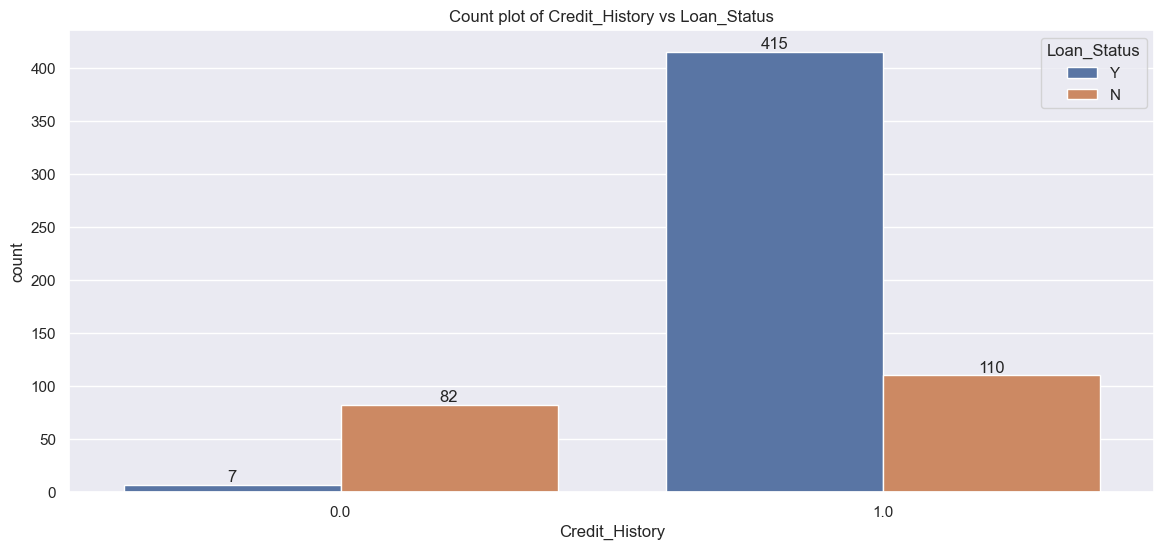

In [163]:
### Categorical features vs Target variable
for feature in categorical_features:
    if feature == 'Loan_Status':
        continue
    plt.figure(figsize=(14,6))
    plt.title(f'Count plot of {feature} vs Loan_Status')
    ax = sns.countplot(x = feature, data = df_train, hue='Loan_Status')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

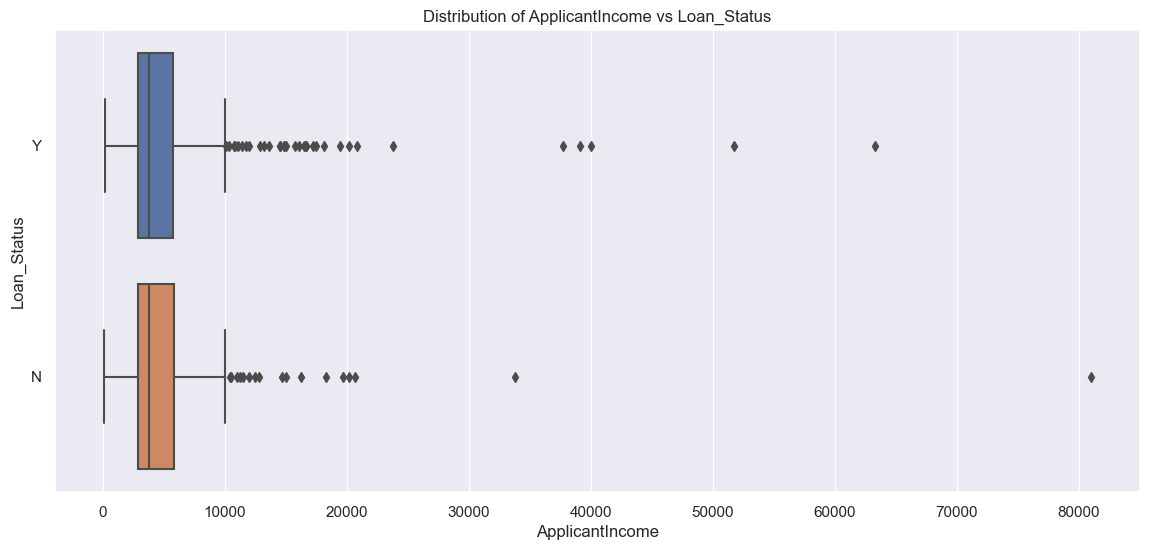

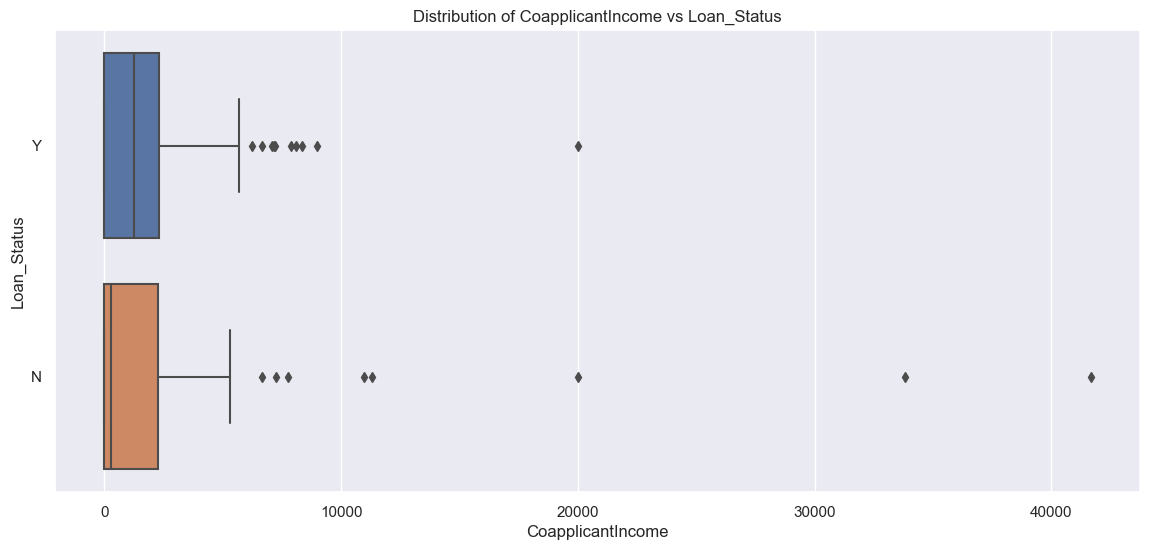

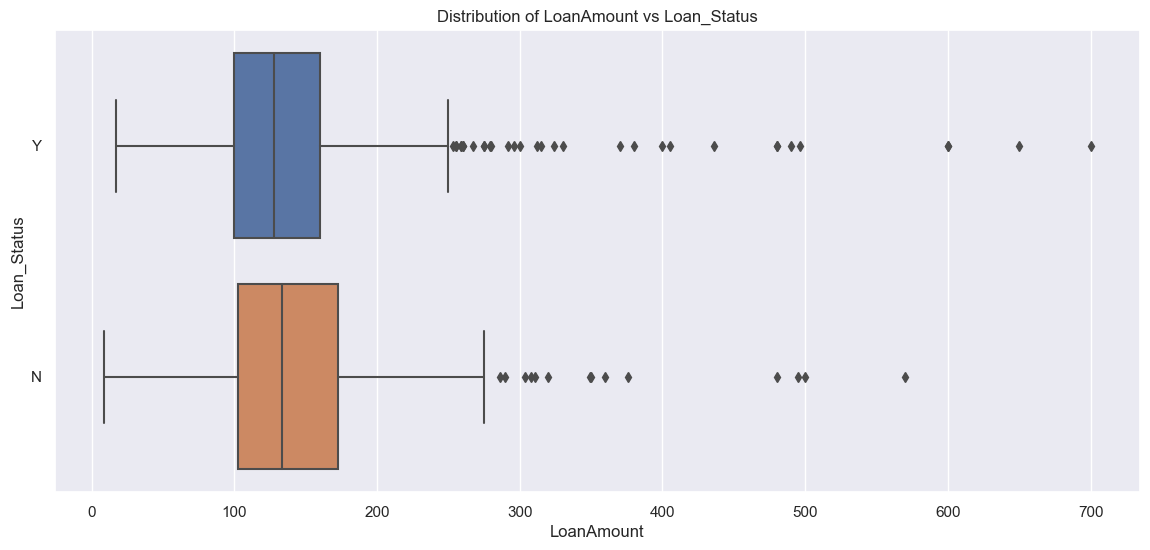

In [164]:
### Numerical features vs Target variable
for feature in numerical_features:
    plt.figure(figsize=(14,6))
    plt.title(f'Distribution of {feature} vs Loan_Status')
    sns.boxplot(x = feature, y = 'Loan_Status', data = df_train)
    plt.show()

- We can also see there are some outliers in numerical features

### Removing Outliers

In [170]:
numerical_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [171]:
q1 = df_train['ApplicantIncome'].quantile(0.25)
q3 = df_train['ApplicantIncome'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
higher_limit = q3 + 1.5*iqr
df = df_train.copy()
df = df[(df['ApplicantIncome'] > lower_limit) & (df['ApplicantIncome'] < higher_limit)]

In [172]:
df.shape

(564, 13)

In [173]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
higher_limit = q3 + 1.5*iqr
df = df[(df['CoapplicantIncome'] > lower_limit) & (df['CoapplicantIncome'] < higher_limit)]

In [174]:
df.shape

(548, 13)

In [175]:
q1 = df['LoanAmount'].quantile(0.25)
q3 = df['LoanAmount'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
higher_limit = q3 + 1.5*iqr
df = df[(df['LoanAmount'] > lower_limit) & (df['LoanAmount'] < higher_limit)]

In [176]:
df.shape

(520, 13)

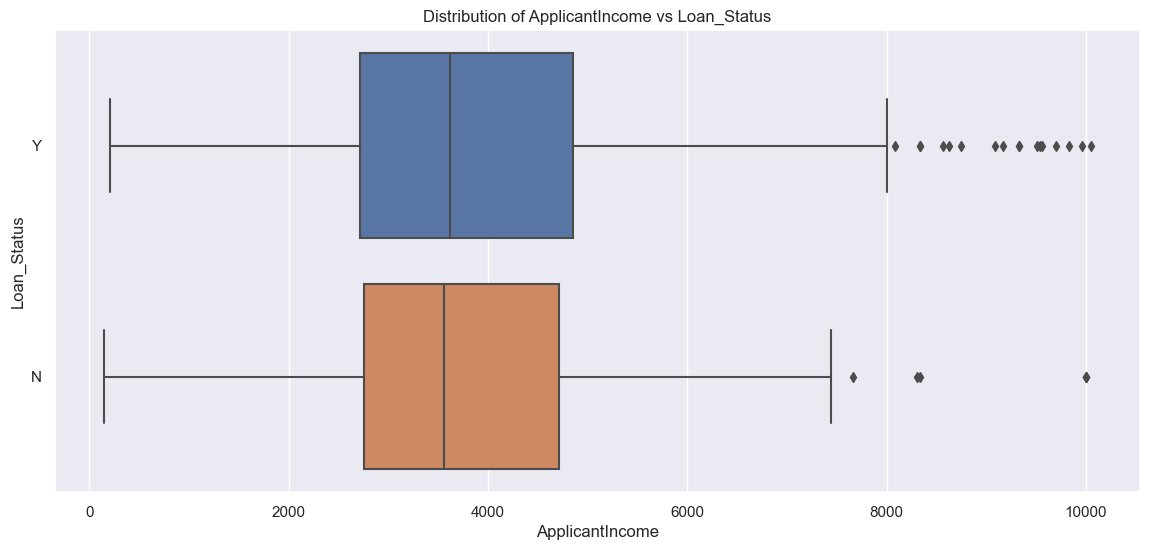

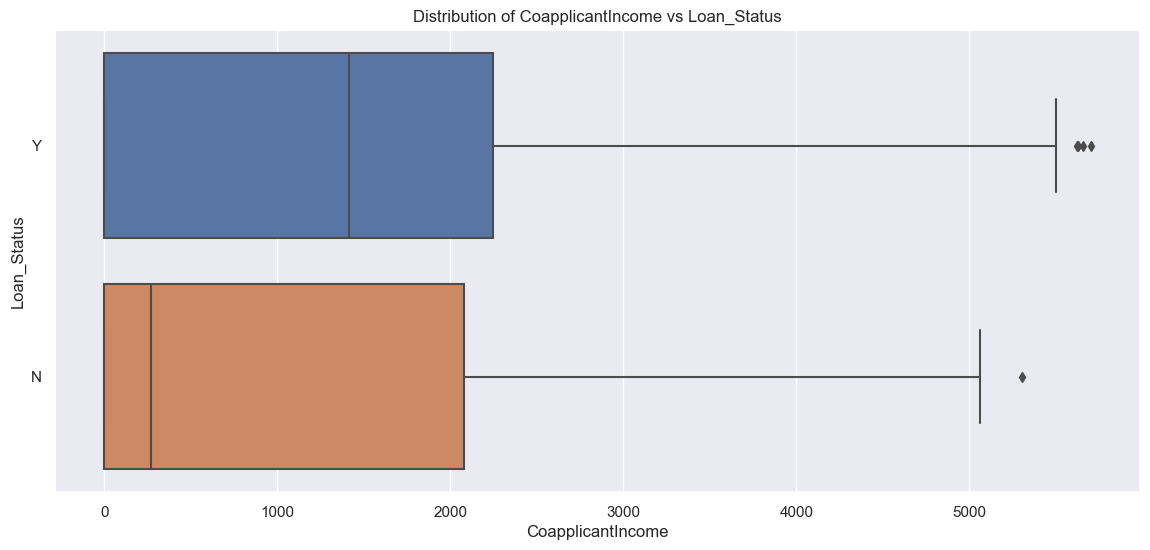

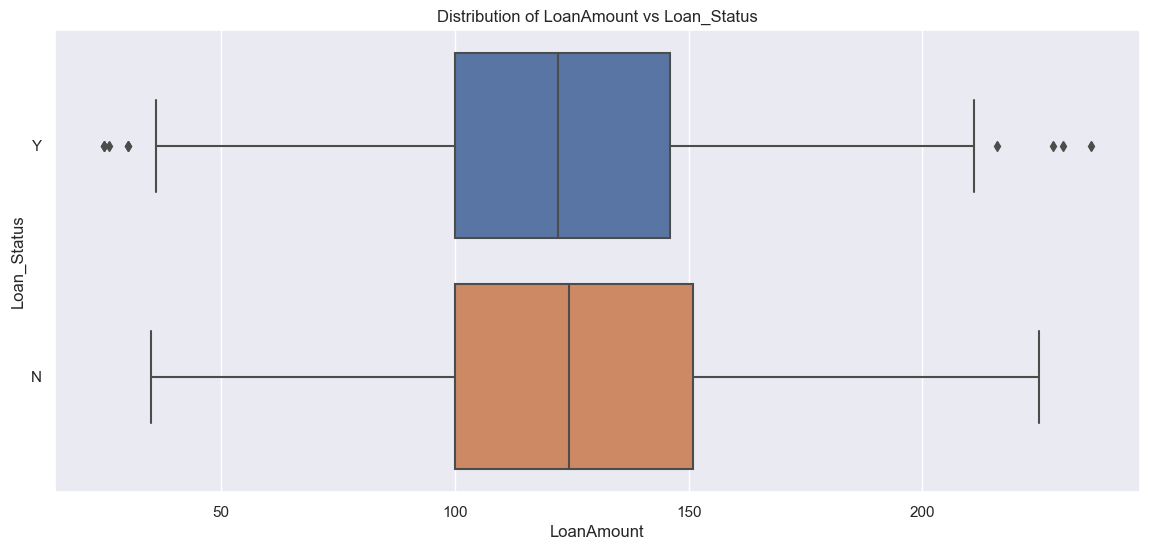

In [177]:
for feature in numerical_features:
    plt.figure(figsize=(14,6))
    plt.title(f'Distribution of {feature} vs Loan_Status')
    sns.boxplot(x = feature, y = 'Loan_Status', data = df)
    plt.show()

### Numerical Features distribution

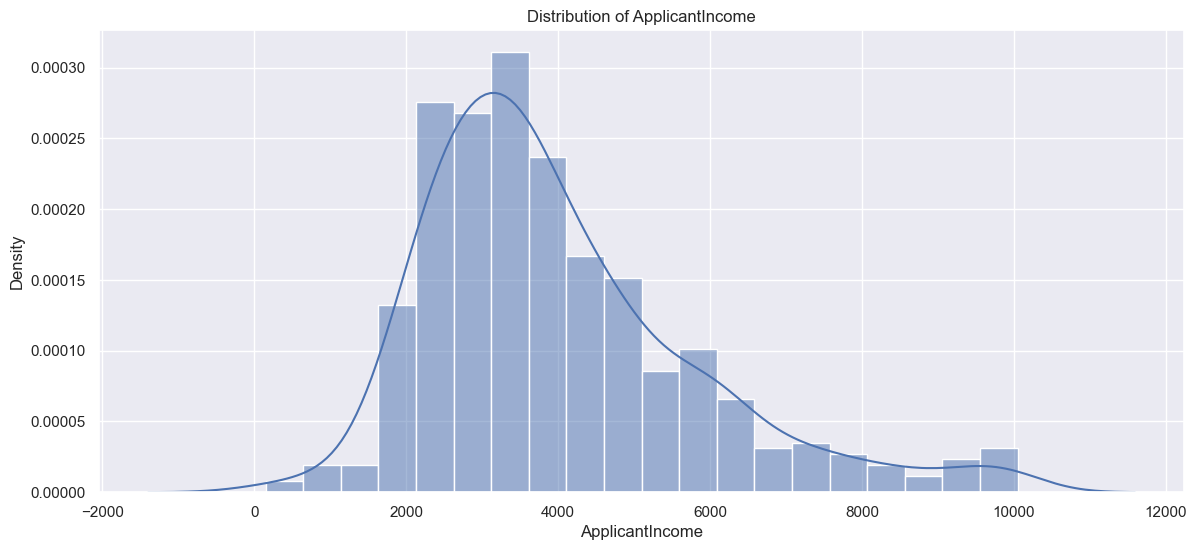

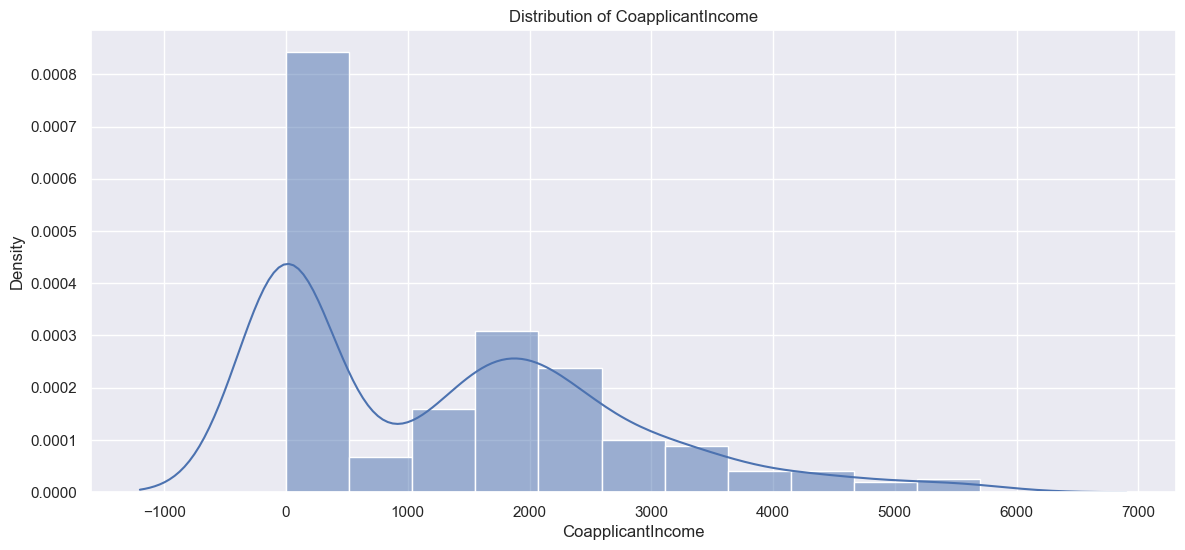

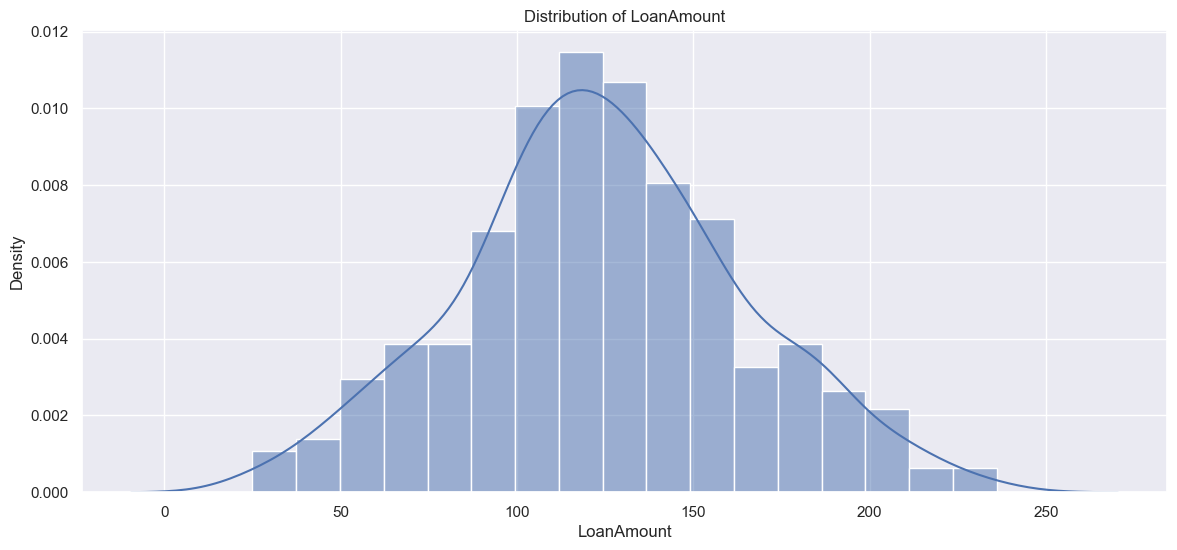

In [178]:
for feature in numerical_features:
    plt.figure(figsize=(14,6))
    sns.histplot(df[feature], kde=True, stat='density',kde_kws=dict(cut=3))
    plt.title(f'Distribution of {feature}')
    plt.show()

- See Removing outliers can significantly affect the distribution of the data.

### Handling Categorical Data

In [186]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [188]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [189]:
df['Married'] = df['Married'].map({'Yes':1,'No':0})

In [191]:
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})

In [193]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})

In [195]:
df['Property_Area'] = df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':0})

In [196]:
df['Loan_Status'].value_counts()

Y    362
N    158
Name: Loan_Status, dtype: int64

In [197]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})

In [208]:
df['Dependents'].value_counts()

0     315
2      86
1      81
3+     38
Name: Dependents, dtype: int64

In [209]:
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [210]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


- We don't need Loan_ID so we can drop that feature

In [230]:
df['Loan_Status'].value_counts()

1    362
0    158
Name: Loan_Status, dtype: int64

In [199]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [200]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


### Model Building

In [211]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [212]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,1,0,3232,1950.0,108.0,360.0,1.0,0
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [213]:
y

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
610    1
612    1
613    0
Name: Loan_Status, Length: 520, dtype: int64

In [251]:
## Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [252]:
X_train.shape

(416, 11)

### Random Forest Classifier

In [253]:
from sklearn.ensemble import RandomForestClassifier

In [266]:
model = RandomForestClassifier(n_estimators=1000,class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

In [267]:
model.score(X_test, y_test)

0.8076923076923077

In [268]:
from sklearn.metrics import confusion_matrix, classification_report

In [269]:
y_pred = model.predict(X_test)

In [270]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 16],
       [ 4, 69]], dtype=int64)

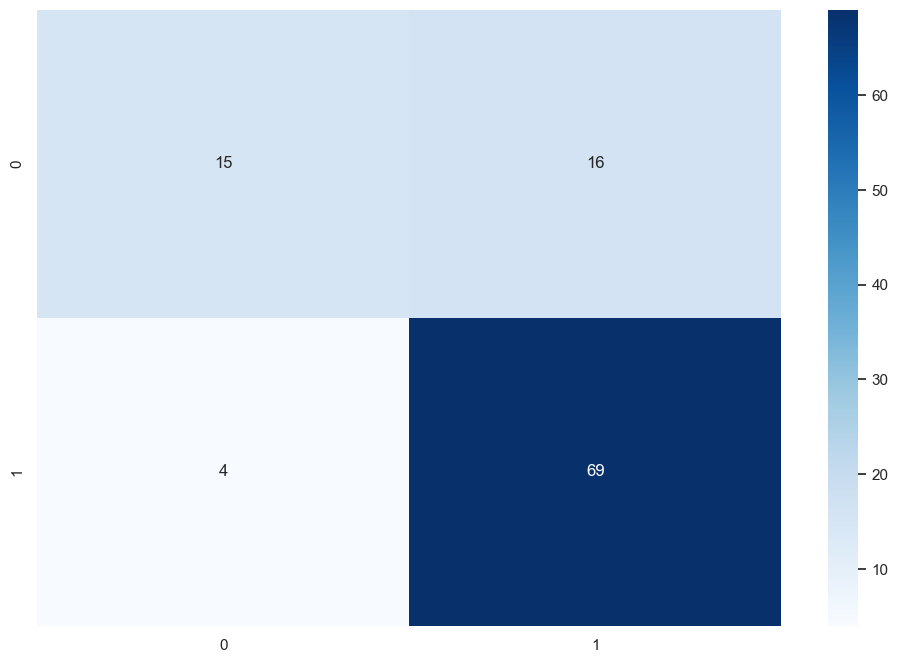

In [271]:
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [272]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.48      0.60        31
           1       0.81      0.95      0.87        73

    accuracy                           0.81       104
   macro avg       0.80      0.71      0.74       104
weighted avg       0.81      0.81      0.79       104



### Test Data

In [273]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [277]:
df_test.drop(['Loan_ID'], axis=1, inplace=True)

In [278]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [279]:
df_test['Gender'] = df_test['Gender'].map({'Male':1,'Female':0})
df_test['Dependents'] = df_test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df_test['Property_Area'] = df_test['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':0})
df_test['Education'] = df_test['Education'].map({'Graduate':1,'Not Graduate':0})
df_test['Married'] = df_test['Married'].map({'Yes':1,'No':0})
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes':1,'No':0})

In [280]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2


In [281]:
loan_status = model.predict(df_test)

In [289]:
loan_status

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [294]:
np.unique(loan_status, return_counts=True)

(array([0, 1], dtype=int64), array([ 70, 297], dtype=int64))

In [299]:
a,b = np.unique(loan_status, return_counts=True)

In [300]:
list(a)

[0, 1]

In [301]:
list(b)

[70, 297]

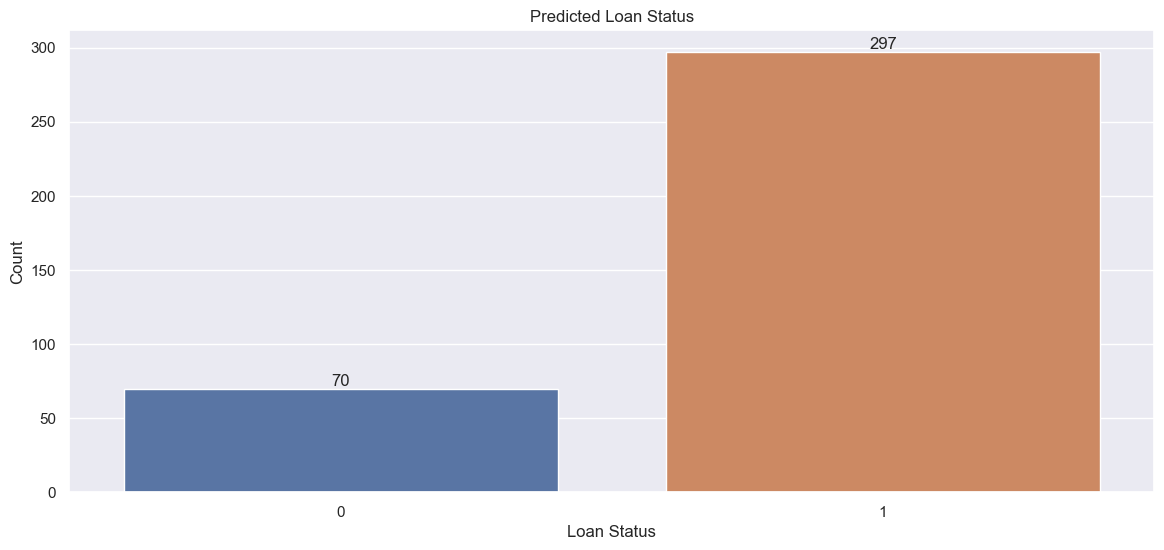

In [303]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=list(a), y=list(b))
plt.title('Predicted Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
plt.show()